In [24]:
import cv2
import imutils
import matplotlib.pyplot as plt

In [38]:
image = cv2.imread("data/chinese.sample.jpg")
mask = cv2.imread("data/mask.jpg")

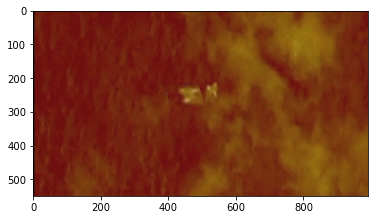

In [44]:
plt.imshow(image)

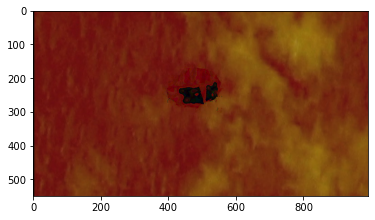

In [45]:
result = cv2.bitwise_and(mask, image)
plt.imshow(result)

In [34]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, filter using contour approximation, aspect ratio, and contour area
threshold_max_area = 5500
threshold_min_area = 10
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.035 * peri, True)
    x,y,w,h = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(c) 
    if len(approx) == 4 and area < threshold_max_area and area > threshold_min_area and (aspect_ratio >= 0.9 and aspect_ratio <= 1.1):
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

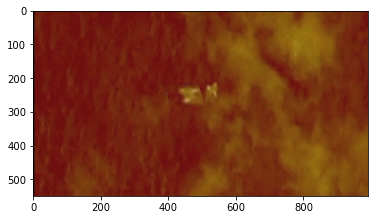

In [35]:
plt.imshow(image)